In [39]:
from scipy.stats import norm, uniform
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0, 'python/')
from python.utils import *
from python.protocol import Protocol
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor

In [40]:
seed = 1
n_LS = 10

sample_sizes = [1000+200*i for i in range(50)]

mean_noise_Ridge = list()
mean_noise_KNN = list()

mean_var_Ridge = list()
mean_var_KNN = list()

mean_bias_2_Ridge = list()
mean_bias_2_KNN = list()

mean_error_Ridge = list()
mean_error_KNN = list()

for sample_size in sample_sizes:
    X, y = make_data(sample_size, scale=0.5, seed=seed)
    seed += 1
    p = Protocol(X, y, n_LS, [Ridge(alpha=1.0), KNeighborsRegressor(n_neighbors=10)])
    noise = p.get_noise()
    var, bias_2 = p.get_variance_bias()
    error = p.get_expected_error()

    mean_noise_Ridge.append(np.mean(noise[0]))
    mean_noise_KNN.append(np.mean(noise[1]))

    mean_var_Ridge.append(np.mean(var[0]))
    mean_var_KNN.append(np.mean(var[1]))

    mean_bias_2_Ridge.append(np.mean(bias_2[0]))
    mean_bias_2_KNN.append(np.mean(bias_2[1]))

    mean_error_Ridge.append(np.mean(error[0]))
    mean_error_KNN.append(np.mean(error[1]))

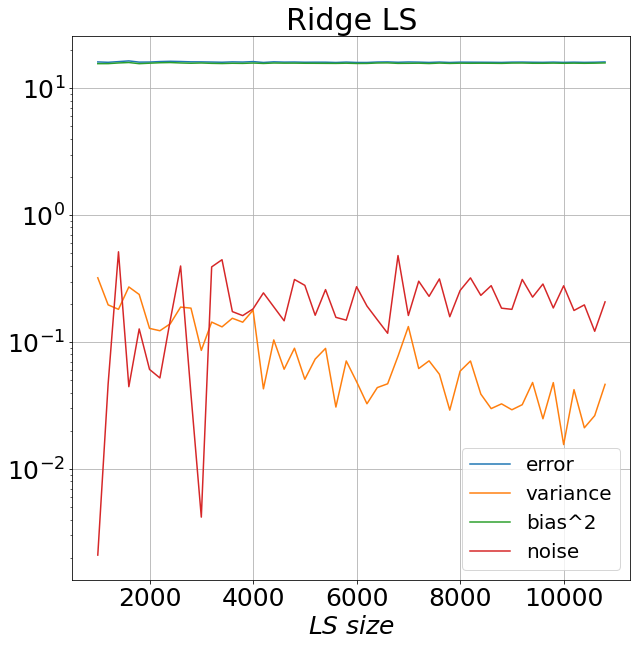

In [41]:
plt.figure(figsize=(10, 10))
plt.plot(sample_sizes, mean_error_Ridge)
plt.plot(sample_sizes, mean_var_Ridge)
plt.plot(sample_sizes, mean_bias_2_Ridge)
plt.plot(sample_sizes, mean_noise_Ridge)
plt.legend(["error", "variance", "bias^2", "noise"], fontsize=20)
plt.xlabel('$LS$ $size$', fontsize=25)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.title('Ridge LS', fontsize=30)
plt.yscale("log")
plt.grid()
plt.savefig("plots/ridge_ls")

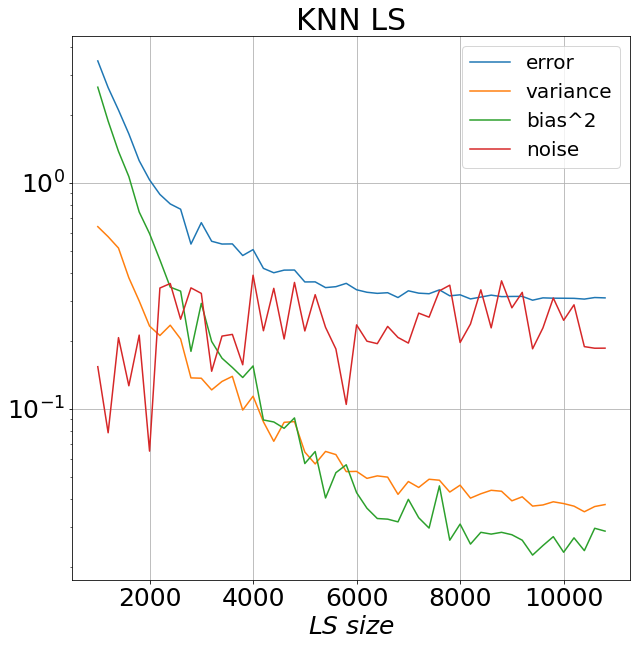

In [42]:
plt.figure(figsize=(10, 10))
plt.plot(sample_sizes, mean_error_KNN)
plt.plot(sample_sizes, mean_var_KNN)
plt.plot(sample_sizes, mean_bias_2_KNN)
plt.plot(sample_sizes, mean_noise_KNN)
plt.legend(["error", "variance", "bias^2", "noise"], fontsize=20)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.xlabel('$LS$ $size$', fontsize=25)
plt.title('KNN LS', fontsize=30)
plt.yscale("log")
plt.grid()
plt.savefig("plots/knn_ls")